# Principal Components Analysis (PCA)

This notebook describes use of PCA using **MATLAB**'s built-in **pca** function. Some useful references include:

* [**MATLAB**'s **pca** documentation](https://www.mathworks.com/help/stats/pca.html)
* [PCA Demystified @ matlabtips.com](http://www.matlabtips.com/pca-demystified/)

____________
## Step 1:  Load and combine data

In [1]:
addpath('/Users/todd/Documents/MATLAB/Libraries/fdaM/')
addpath(genpath('/Users/todd/WorkingCopies/spm1dmatlab/trunk/'))
addpath('/Users/todd/Documents/Professional/Conferences/Workshops/180707-Dublin/Scripts/')

load('Warmenhoven2018-bow-force.mat');
Y = [Pin_Force_Bow_Male Pin_Force_Bow_Female]';


Now all data are combined in a single (20 x 51) array, where the first and second 10 rows contain the male and female data, respectively.

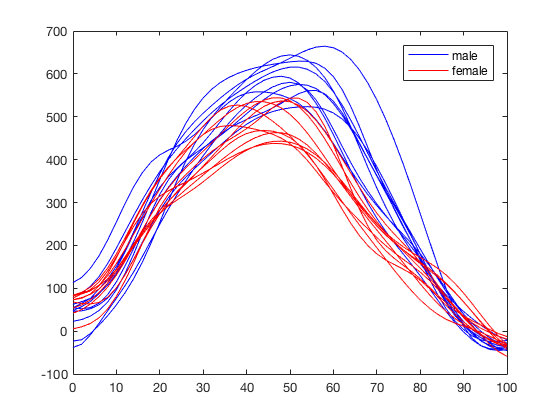

In [2]:
t  = linspace(0, 100, 51);  %time
h1 = plot(t, Y(1:10,:)', 'b');
hold on
h2 = plot(t, Y(11:20,:)', 'r');
legend([h1(1) h2(1)], 'male', 'female')

____________
## Step 2: Run PCA

**MATLAB**'s built-in **pca** function can be applied to these data as a means of dimension reduction.


In [3]:
[coeff,score,latent,tsquared,explained] = pca(Y);

The outputs from **pca** include:

<img src="figs/screenshot-5-1.jpeg" width="300">

* **coeff**: co-efficients representing the principal components (PCs)
* **score**: principal component scores (data representaton in PC space)
* **latent**: principal component variances (eigenvalues of the data covariance matrix)
* **tsquared**: Hotelling's T-squared statistic for each subject
* **explained**: percentage of variability explained by each PC

____________
## Step 3:  Explore the principal component (PC) trajectories

Let's plot the first two principal components:

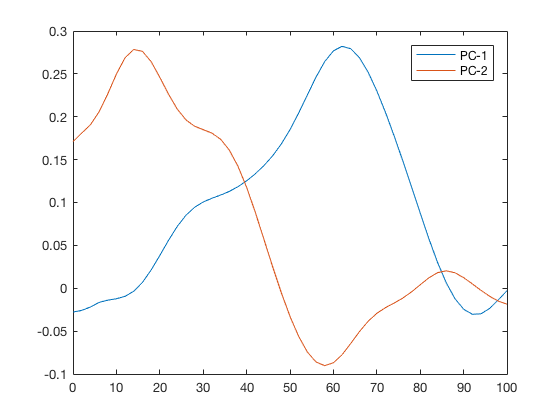

In [4]:
pc1 = coeff(:,1);
pc2 = coeff(:,2);

plot(t, pc1)
hold on
plot(t, pc2)
legend('PC-1', 'PC-2')

From the **explained** variable we can see that these two PCs respectively represent 69.4% and 15.7% of the variability in this dataset:

In [5]:
disp( explained(1:5) )

   69.3861
   15.7234
    9.6379
    2.1492
    1.4753



The meaning of these PCs is somewhat clearer when added / subtracted from the original data's mean trajectory:

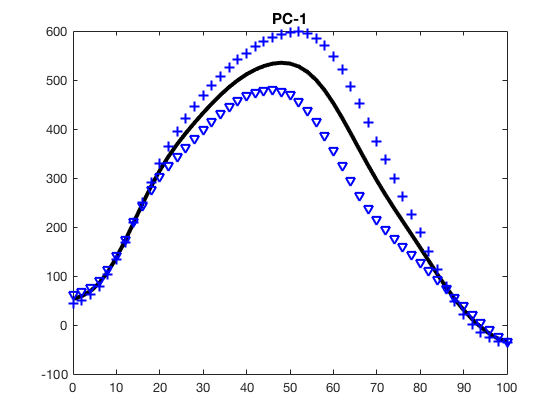

In [6]:
ymean    = mean(Y, 1)';
scoresd  = std(score, [], 1)';
plot(t, ymean, 'k', 'linewidth', 3)
hold on
plot(t, ymean + scoresd(1) .* pc1, 'b+')
plot(t, ymean - scoresd(1) .* pc1, 'bv')
title('PC-1')

Here the PC is weighted by the standard deviation of its scores.  This result is similar to plotting the usual mean and standard deviation:

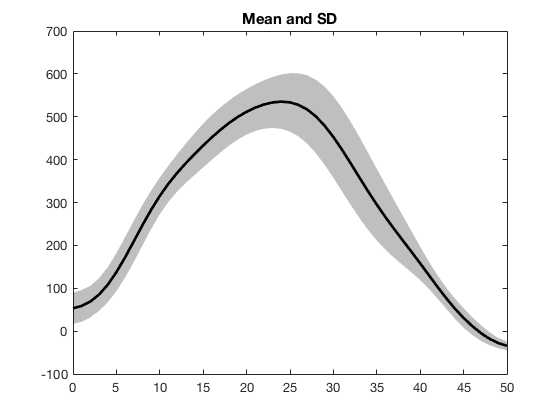

In [7]:
spm1d.plot.plot_meanSD(Y);
title('Mean and SD')

The second PC looks like this:

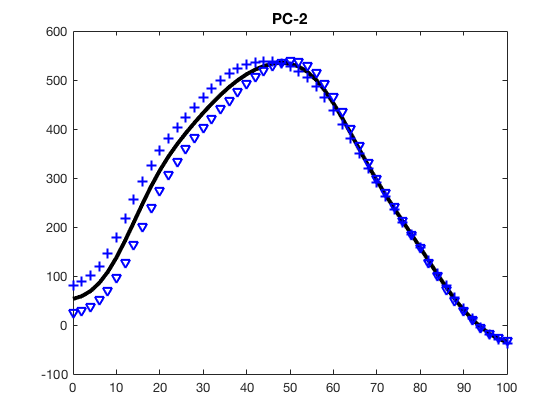

In [8]:
plot(t, ymean, 'k', 'linewidth', 3)
hold on
plot(t, ymean + scoresd(2) .* pc2, 'b+')
plot(t, ymean - scoresd(2) .* pc2, 'bv')
title('PC-2')

This result is quite different from the usual mean and SD and implies that variation in the first half of the trajectory accounts for a substantial portion (15.7%) of the total variance.

____________
## Step 4:  Explore PC scores

It is also informative to visualize the PC scores. The **score** variable is (20 x 19), implying that each of the 20 subjects have one score value for each PC. So let's try plotting the males' and females' scores for the first two components in different colors:

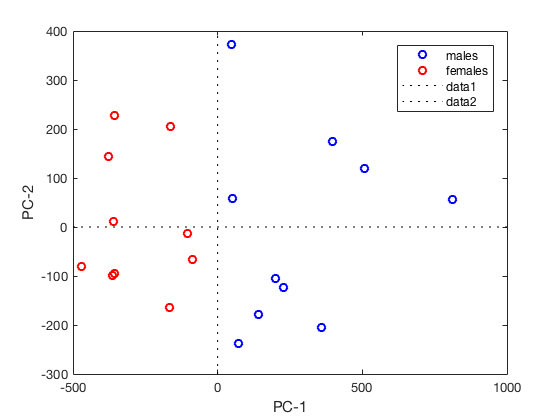

In [9]:
plot( score(1:10,1), score(1:10,2), 'bo' );
hold on
plot( score(11:20,1), score(11:20,2), 'ro' );
plot( score(11:20,1), score(11:20,2), 'ro' );
xlabel('PC-1')
ylabel('PC-2')
legend('males', 'females')
ax = gca();
plot([0 0], get(ax,'ylim'), 'k:')
plot(get(ax,'xlim'), [0 0], 'k:')


We can see a score of PC-1 = 0 clearly separates the males from the females.  Knowing this let's replot the first PC trajectory with PC-1 deviations like this: 

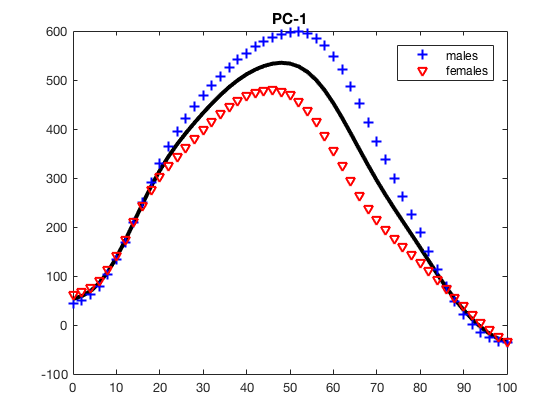

In [10]:
plot(t, ymean, 'k', 'linewidth', 3)
hold on
h1 = plot(t, ymean + scoresd(1) .* pc1, 'b+');
h2 = plot(t, ymean - scoresd(1) .* pc1, 'rv');
title('PC-1')
legend([h1, h2], 'males', 'females')

Now PC-1 is much easier to interpret:  this figure suggests that, relative to the overall (male+female) mean, males tend to have smaller initial forces but larger forces from approximately time = 20% to approximately 80%. 

This interpretation is effectively identical to the intrepretations from SPM, SnPM and FDA's t test with one important exception: these PCA results do not explicitly contain probability information, so it is not possible to make probabilistic conclusions based on these PCA results.

Nevertheless, this type of PC visualization can be very useful in other datasets for which we might not know whether or not there are clearly distinguishable groups within our dataset.  In this dataset, for example, if we had not known that the first 10 subjects were males and the second 10 subjects were females, this PC exploration would show us that we have two differently-behaving groups, and that this overall different behavior accounts for a large proportion (69.3%) of the total dataset variability.